<a href="https://colab.research.google.com/github/Sparten-Ashvinee/EIP-4/blob/master/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import keras
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import SeparableConv2D, MaxPooling2D, Convolution2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 6s 0us/step


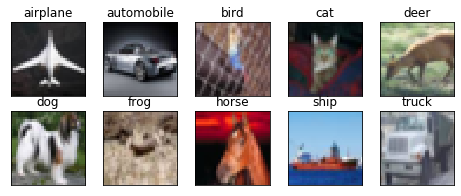

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
train_features.shape

(50000, 32, 32, 3)

In [0]:
train_labels.shape

(50000, 1)

In [0]:
num_classes

10

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
##########  MODEL 2 ###################

model = Sequential()
model.add(SeparableConv2D(48, (3, 3), border_mode='same', input_shape=(32, 32, 3)))   #32x32x48   #3
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(SeparableConv2D(48, (3, 3),))   #30x30x48   #5
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Convolution2D(128, (1, 1)))   #30x30x128   #5
model.add(MaxPooling2D(pool_size=(2, 2)))   #15x15x128   #6
model.add(BatchNormalization())
model.add(SeparableConv2D(96, (3, 3), border_mode='same'))    #15x15x96   #10
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(SeparableConv2D(96, (3, 3)))    #13x13x96   #14
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Convolution2D(200, (1, 1)))   #13x13x200   #14
model.add(MaxPooling2D(pool_size=(2, 2)))   #6x6x200    #16
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(192, (3, 3), border_mode='same'))   #6x6x192    #24
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(SeparableConv2D(10, (4, 4)))    #3x3x10    #36
model.add(Activation('relu'))
model.add(Dropout(0.1))
#model.add(Convolution2D(128, (1, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))   #1x1x10    #40
model.add(BatchNormalization())
#model.add(Dropout(0.25))
model.add(Flatten())   
#model.add(Dense(num_classes, activation='softmax'))
#model.add(Convolution2D(10, (1, 1)))
model.add(Activation('softmax'))
# Compile the model
adam = Adam(lr=0.08, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), padding="same")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(192, (3, 3), padding="same")`


In [0]:
##########  MODEL 2  ##########
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_67 (Separab (None, 32, 32, 48)        219       
_________________________________________________________________
activation_75 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
dropout_77 (Dropout)         (None, 32, 32, 48)        0         
_________________________________________________________________
separable_conv2d_68 (Separab (None, 30, 30, 48)        2784      
_________________________________________________________________
activation_76 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
dropout_78 (Dropout)         (None, 30, 30, 48)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 30, 30, 128)     

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`


Epoch 1/50


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


390/390 [==============================] - 48s 124ms/step - loss: 1.7711 - acc: 0.3551 - val_loss: 1.5053 - val_acc: 0.4653
Epoch 2/50
390/390 [==============================] - 42s 109ms/step - loss: 1.4625 - acc: 0.4843 - val_loss: 1.4612 - val_acc: 0.4752
Epoch 3/50
390/390 [==============================] - 42s 109ms/step - loss: 1.3324 - acc: 0.5324 - val_loss: 1.2072 - val_acc: 0.5795
Epoch 4/50
390/390 [==============================] - 42s 109ms/step - loss: 1.2422 - acc: 0.5670 - val_loss: 1.1754 - val_acc: 0.5848
Epoch 5/50
390/390 [==============================] - 42s 108ms/step - loss: 1.1719 - acc: 0.5923 - val_loss: 1.0197 - val_acc: 0.6459
Epoch 6/50
390/390 [==============================] - 42s 109ms/step - loss: 1.1139 - acc: 0.6146 - val_loss: 0.9653 - val_acc: 0.6693
Epoch 7/50
390/390 [==============================] - 42s 108ms/step - loss: 1.0629 - acc: 0.6317 - val_loss: 0.9546 - val_acc: 0.6746
Epoch 8/50
390/390 [==============================] - 42s 108ms/st

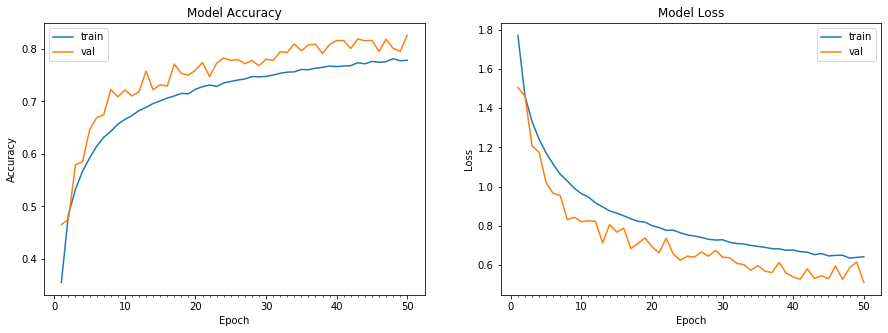

Accuracy on test data is: 82.61


In [0]:
#############  RESULT OF MODEL 2 ##########
########  WITH AUGMENTATION ########
########  WITH 99,133  TOTAL PARAMETERS ###########
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    zoom_range=0.0,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

# datagen.fit(train_features)
# datagen.fit(test_features)

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
#############  RESULT OF MODEL 2 ##########
model.evaluate(test_features,test_labels)

10000/10000 [==============================] - 3s 315us/step


[0.5114031600952148, 0.8261]